**Assignment: Flowers Recognition**

**Dataset Description:**

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

**WORKFLOW :**

**Load Data**
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction




https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import glob
import pickle 
import cv2
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import seaborn as sb
sb.set()
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory= Path("/content/drive/MyDrive/flowers")

In [ ]:
image_names = []
data_images = []
labels = []

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  image_names.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr, (320,240))
      data_images.append(imgarr)

rose
dandelion
tulip
sunflower
daisy
flowers


In [ ]:
# maping the string label 
df=pd.DataFrame(labels)
labels=df[0].map({"rose":0,"sunflower":1,"tulip":2,"daisy":3,"dandelion":4})


In [10]:
# data and label spliting by machine learning
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_images,labels,test_size=.40,random_state=0)

In [18]:
#Data conversion into numpy array and data type float
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [19]:
#Print the shape of training data,testing data,training labels,testing labels

print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(2593, 240, 320)
shape of training label is :(2593,)
shape of testing data is :(1730, 240, 320)
shape of testing label is :(1730,)


In [20]:
#Reshaping
X_train=X_train.reshape(2593,320*240)
X_test=X_test.reshape(1730,320*240)

In [21]:
#checking the value of train data
X_train[0]

array([ 95.,  95.,  95., ..., 187., 183., 177.], dtype=float32)

In [22]:
#checking the data value test
X_test[0]

array([74., 75., 85., ..., 56., 52., 65.], dtype=float32)

In [26]:
#normalize the data
X_train=X_train/255.0
X_test=X_test/255.0

In [27]:
 from keras.utils import to_categorical
 y_train=to_categorical(y_train)
 y_test=to_categorical(y_test)

In [29]:
# import the keras libararies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop

In [46]:
#model building
network_model=Sequential()
network_model.add(Dense(250,activation="relu",input_shape=(X_train.shape[1],)))
network_model.add(Dropout(0.2))
network_model.add(Dense(128,activation="relu"))

#network_model.add(Dropout(0.2))
network_model.add(Dense(64,activation="relu"))
network_model.add(Dropout(0.2))
network_model.add(Dense(5,activation="softmax"))

In [47]:
#summary of the Model
network_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 250)               19200250  
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32128     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 325       
Total params: 19,240,959
Trainable params: 19,240,959
Non-trainable params: 0
__________________________________________

In [48]:
#Compilation Step
network_model.compile(optimizer=RMSprop(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
history=network_model.fit(X_train, y_train,batch_size=20,epochs=100)

Epoch 1/100
130/130 [==============================] - 22s 163ms/step - loss: 1.6085 - accuracy: 0.2347
Epoch 2/100
130/130 [==============================] - 21s 163ms/step - loss: 1.6060 - accuracy: 0.2408
Epoch 3/100
130/130 [==============================] - 21s 162ms/step - loss: 1.6033 - accuracy: 0.2326
Epoch 4/100
130/130 [==============================] - 21s 163ms/step - loss: 1.6013 - accuracy: 0.2161
Epoch 5/100
130/130 [==============================] - 21s 163ms/step - loss: 1.6027 - accuracy: 0.2379
Epoch 6/100
130/130 [==============================] - 21s 163ms/step - loss: 1.5981 - accuracy: 0.2529
Epoch 7/100
130/130 [==============================] - 21s 163ms/step - loss: 1.5965 - accuracy: 0.2473
Epoch 8/100
130/130 [==============================] - 21s 163ms/step - loss: 1.5994 - accuracy: 0.2402
Epoch 9/100
130/130 [==============================] - 21s 163ms/step - loss: 1.6005 - accuracy: 0.2356
Epoch 10/100
130/130 [==============================] - 21s 163m

In [50]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

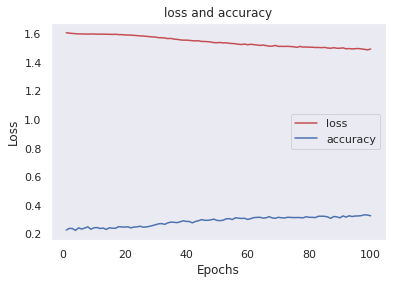

In [51]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_accuracy = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='loss')
plt.plot(epochs, val_accuracy, 'b', label='accuracy')
plt.title('loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [60]:
network_model.evaluate(X_test,y_test)

55/55 [==============================] - 2s 36ms/step - loss: 1.5139 - accuracy: 0.3237


[1.5138792991638184, 0.323699414730072]

In [61]:
pred = network_model.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

2 ==> [0. 0. 1. 0. 0.]
4 ==> [0. 0. 0. 1. 0.]
2 ==> [0. 1. 0. 0. 0.]
4 ==> [0. 0. 0. 0. 1.]
4 ==> [0. 0. 0. 0. 1.]
1 ==> [0. 1. 0. 0. 0.]
4 ==> [0. 1. 0. 0. 0.]
1 ==> [0. 1. 0. 0. 0.]
2 ==> [0. 0. 0. 1. 0.]
4 ==> [1. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
